<a href="https://colab.research.google.com/github/aqil0300/resume-classifier/blob/main/resume_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cp "/content/drive/MyDrive/CNN_dataset/non_resume.zip" "/content"
!cp "/content/drive/MyDrive/CNN_dataset/resumes.zip" "/content"

In [ ]:
!unzip resumes.zip
!unzip non_resume.zip

Archive:  resumes.zip
   creating: resumes/
  inflating: resumes/132834697_1786356748212247_6007271417712918649_n_jpg.rf.555016aec3add4379ea4d184b705cfcd.jpg  
  inflating: resumes/132834697_1786356748212247_6007271417712918649_n.rf.32f77cfc76528dc59f9b856d18526185.jpg  
  inflating: resumes/1629756071561.rf.cfeff3177aa7d6c8fa83c1293281aef2.jpg  
  inflating: resumes/1631019580839.rf.32e17cd0ff012d4fa6ef3600e7f42bc7.jpg  
  inflating: resumes/1631260169080_jpg.rf.15f5095699b3de33e3f63ea5f34c5ca4.jpg  
  inflating: resumes/1631627838226_jpg.rf.e51fbaa6b1c469dae44129ba73e23404.jpg  
  inflating: resumes/1632079196351-2_jpg.rf.14948d255999f61a3e714f499d298740.jpg  
  inflating: resumes/1632650732006.rf.7bd47caeb95d2bd8283d137bfba1b01a.jpg  
  inflating: resumes/1632864188699_jpg.rf.bdfaaa07576bcf86e3e1c9abe2c689cb.jpg  
  inflating: resumes/1633536069101.rf.d569da04522e2ca4ebf10c551b7d713c.jpg  
  inflating: resumes/1634062195300_jpg.rf.c6aacbe5d50e295465c4ef9baa931ede.jpg  
  inflating: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
import shutil

In [ ]:
resume = '/content/resumes'
non_resume = '/content/non_resume'

In [ ]:
# Specify the directory path
both_data = '/content/both_data'

# Create the directory
os.makedirs(both_data, exist_ok=True)

#copy file
shutil.copytree(resume, os.path.join(both_data, os.path.basename(resume)))
shutil.copytree(non_resume, os.path.join(both_data, os.path.basename(non_resume)))

FileExistsError: ignored

In [ ]:
resume_images = [f'{resume}/{img}' for img in os.listdir(resume)]
non_resume_images = [f'{non_resume}/{img}' for img in os.listdir(non_resume)]

all_images = resume_images + non_resume_images
labels = ['resume'] * len(resume_images) + ['non_resume'] * len(non_resume_images)

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    rescale=1./255
)

In [ ]:
#define hyperparameters
batch_size = 64
epochs = 10
image_size = (244,244)
learning_rate = 0.0001

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [ ]:
training_generator = train_datagen.flow_from_directory(
    both_data,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training'
)

Found 708 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    both_data,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation'
)

Found 176 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(training_generator, epochs=epochs, batch_size=batch_size, validation_data=validation_generator)

Epoch 1/10
12/12 [==============================] - 213s 16s/step - loss: 0.3190 - accuracy: 0.8771 - val_loss: 0.2262 - val_accuracy: 0.9545
Epoch 2/10
12/12 [==============================] - 185s 15s/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 0.1253 - val_accuracy: 0.9602
Epoch 3/10
12/12 [==============================] - 184s 15s/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0944 - val_accuracy: 0.9716
Epoch 4/10
12/12 [==============================] - 196s 16s/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0783 - val_accuracy: 0.9716
Epoch 5/10
12/12 [==============================] - 195s 16s/step - loss: 0.0138 - accuracy: 0.9972 - val_loss: 0.0622 - val_accuracy: 0.9716
Epoch 6/10
12/12 [==============================] - 187s 15s/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0476 - val_accuracy: 0.9773
Epoch 7/10
12/12 [==============================] - 195s 16s/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0634 - val_accuracy: 0.9773
Epoch 

In [ ]:
training_accuracy = history.history['accuracy']
print("Training Accuracy over Epochs:", training_accuracy)

Training Accuracy over Epochs: [0.9053672552108765, 0.9985875487327576, 0.9985875487327576, 1.0, 0.9985875487327576, 0.9985875487327576, 0.9985875487327576, 0.9957627058029175, 1.0, 1.0]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

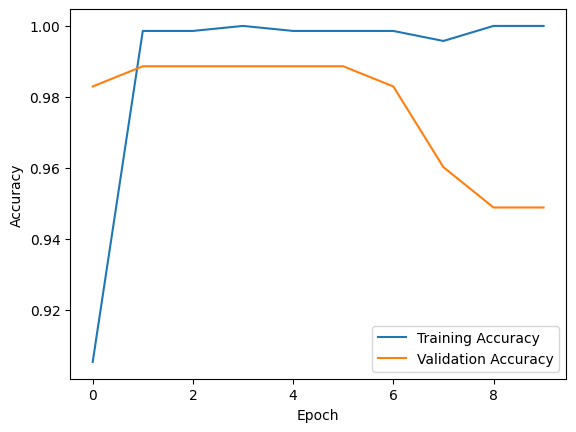

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

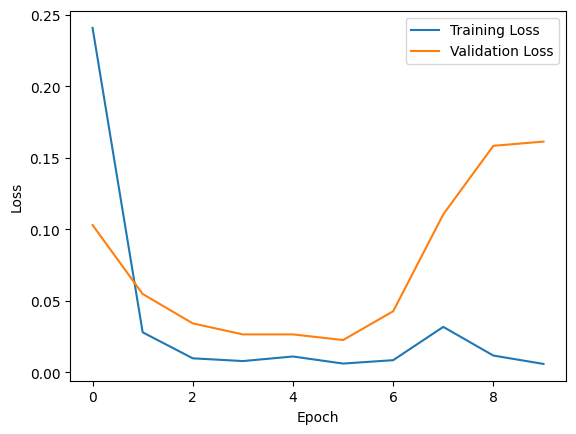

In [ ]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
eval_results = model.evaluate(validation_generator)

# Print the evaluation results
print("Test Loss:", eval_results[0])
print("Test Accuracy:", eval_results[1])


3/3 [==============================] - 24s 6s/step - loss: 0.0634 - accuracy: 0.9659
Test Loss: 0.06342235207557678
Test Accuracy: 0.9659090638160706


In [ ]:
model.save('resume_classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Generate predictions for the test set
predictions = model.predict(validation_generator)

# Convert probabilities to binary predictions
binary_predictions = (predictions > 0.5).astype(int)

# Get true labels
true_labels = validation_generator.classes

3/3 [==============================] - 16s 5s/step


In [ ]:
# Calculate precision, recall, F1-score, and support
report = classification_report(true_labels, binary_predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.57      0.59       100
           1       0.48      0.51      0.49        76

    accuracy                           0.55       176
   macro avg       0.54      0.54      0.54       176
weighted avg       0.55      0.55      0.55       176



In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, binary_predictions)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[57 43]
 [37 39]]


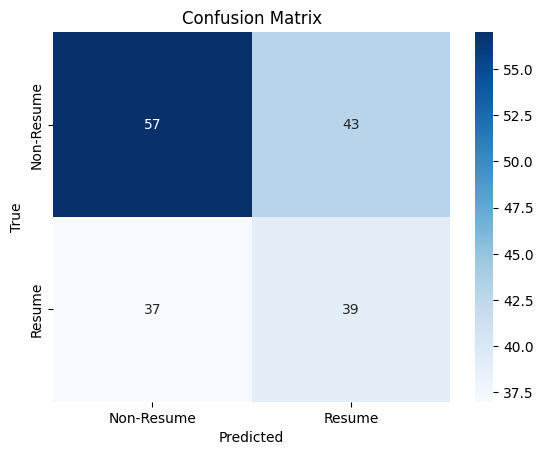

In [ ]:
# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Resume', 'Resume'], yticklabels=['Non-Resume', 'Resume'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = '/content/tiger.1.559435.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make a prediction
prediction = model.predict(img_array)

# Make a prediction with a custom threshold
custom_threshold = 0.7
if prediction[0][0] > custom_threshold:
    print("Predicted: Resume")
else:
    print("Predicted: Non-Resume")



1/1 [==============================] - 0s 58ms/step
Predicted: Non-Resume
